In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Project. Data Analysis and Modeling

## Goal

> ### EDA : Analysis of trends
> ### Modeling : Predict the sales price for each house

# Import Libraries & Read Dataset

In [2]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
import os
from collections import OrderedDict
warnings.filterwarnings("ignore")

# For Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
import tensorflow_decision_forests as tfdf
from tensorflow_decision_forests.keras import pd_dataframe_to_tf_dataset
import xgboost as xgb
import lightgbm as lgb
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

2024-04-08 03:01:39.066351: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 03:01:39.066501: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 03:01:39.258516: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
train_name = '/kaggle/input/house-prices-advanced-regression-techniques/train.csv'
test_name = '/kaggle/input/house-prices-advanced-regression-techniques/test.csv'

train = pd.read_csv(train_name)
test = pd.read_csv(test_name)

In [4]:
print('train shape : ', train.shape)
print('test shape : ', test.shape)

train shape :  (1460, 81)
test shape :  (1459, 80)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# Data Preprocessing

### Remove the ID because it is not used for EDA.

In [8]:
train = train.drop('Id', axis=1)

### If the missing value is more than 50%, it is better to remove value, but the 'NaN' value has meaning, so use it.

In [9]:
missing_value_1 = pd.DataFrame(train.isna().mean(), columns=['percentage'])
missing_value_1 = missing_value_1[missing_value_1['percentage'] >= 0.5]
missing_value_1

,percentage
Alley,0.937671
MasVnrType,0.597260
PoolQC,0.995205
Fence,0.807534
MiscFeature,0.963014


In [10]:
idx = missing_value_1.index

for i in idx:
    print(i,"\'s kinds :",train[i].unique())

Alley 's kinds : [nan 'Grvl' 'Pave']
MasVnrType 's kinds : ['BrkFace' nan 'Stone' 'BrkCmn']
PoolQC 's kinds : [nan 'Ex' 'Fa' 'Gd']
Fence 's kinds : [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature 's kinds : [nan 'Shed' 'Gar2' 'Othr' 'TenC']


### Clears rows with a missing value of 0.5% or less.

In [11]:
missing_value_2 = pd.DataFrame(train.isna().mean(), columns=['percentage'])
missing_value_2 = missing_value_2[(missing_value_2['percentage'] > 0) & (missing_value_2['percentage'] <= 0.5)]
missing_value_2

,percentage
LotFrontage,0.177397
MasVnrArea,0.005479
BsmtQual,0.025342
BsmtCond,0.025342
BsmtExposure,0.026027
BsmtFinType1,0.025342
BsmtFinType2,0.026027
Electrical,0.000685
FireplaceQu,0.472603
GarageType,0.055479


In [12]:
idx = missing_value_2.index

for i in idx:
    print(i,"\'s kinds :",train[i].unique())

LotFrontage 's kinds : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
MasVnrArea 's kinds : [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800

### As a result of analyzing the missing values of the data, it would be better to make the object type a dummy variable and remove the numerical type row.

In [13]:
numeric_col = train.select_dtypes(include=['number']).columns
train_for_EDA = train_for_model = train.dropna(subset=numeric_col)
train_for_model = pd.get_dummies(train_for_model)

In [14]:
print("train shape :",train.shape)
print("train for EDA shape :",train_for_EDA.shape)
print("train for model shape :",train_for_model.shape)

train shape : (1460, 80)
train for EDA shape : (1121, 80)
train for model shape : (1121, 278)


# Data visualization

> # Distribution of SalePrice

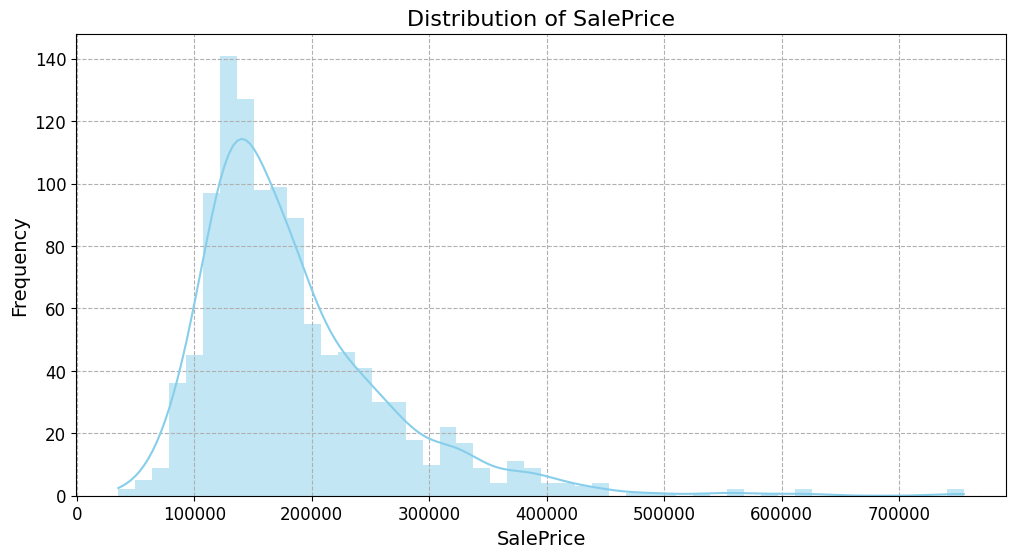

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(train_for_EDA['SalePrice'], bins=50, color='skyblue', edgecolor=None, kde=True)
plt.title('Distribution of SalePrice', fontsize=16)
plt.xlabel('SalePrice', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=0, fontsize=12)  
plt.yticks(fontsize=12)
plt.grid(linestyle='--')
plt.show()

> # Plot of SalePrice vs Numeric values

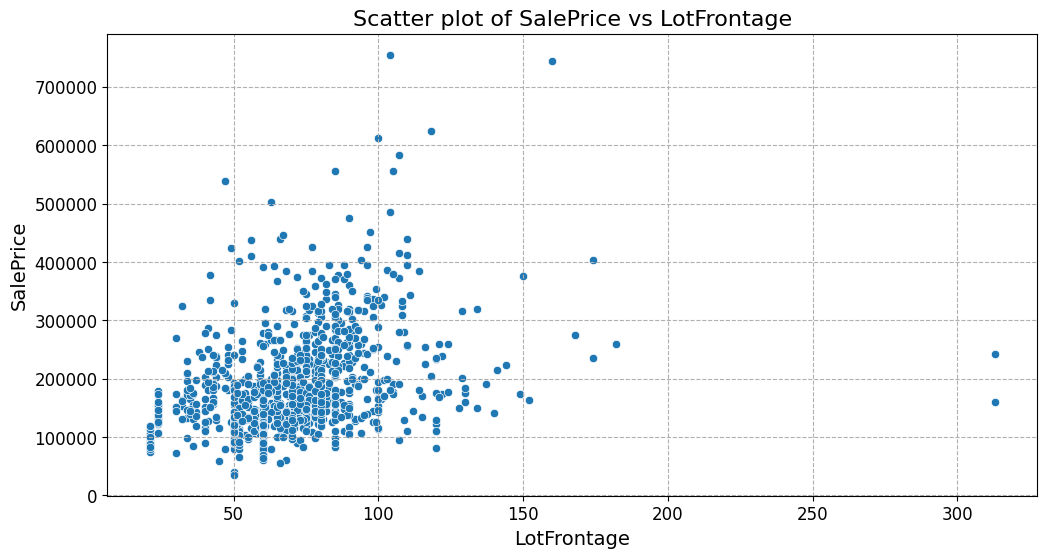

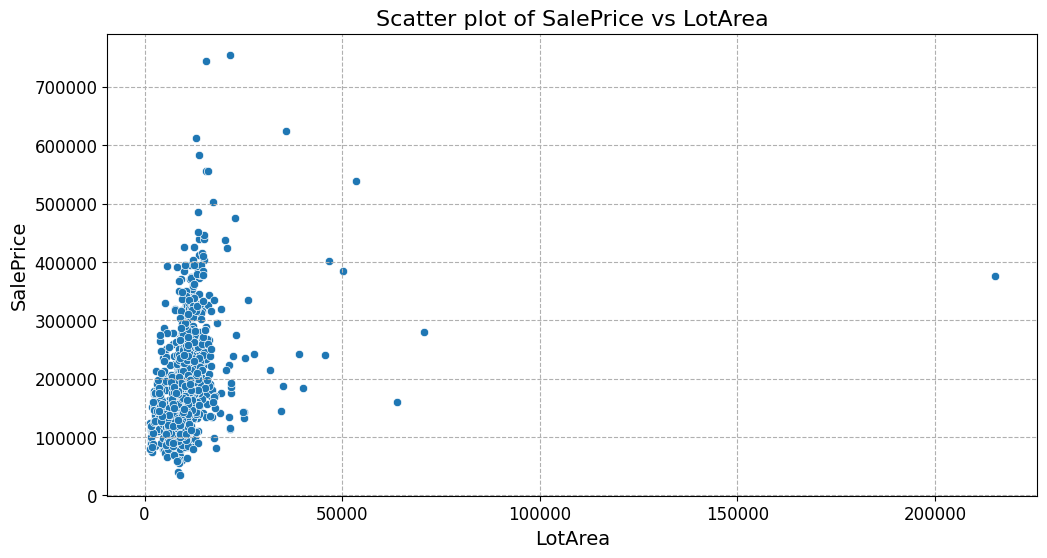

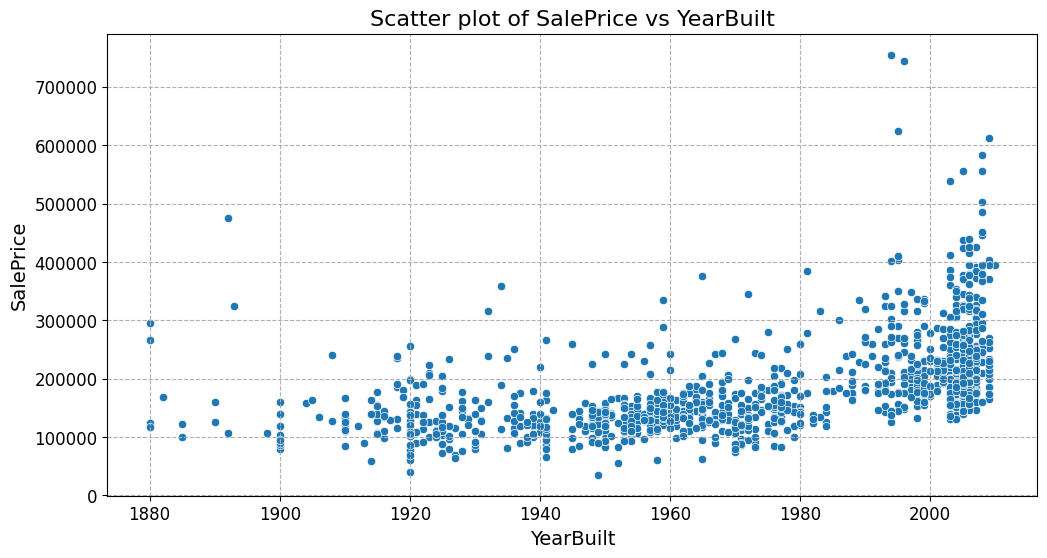

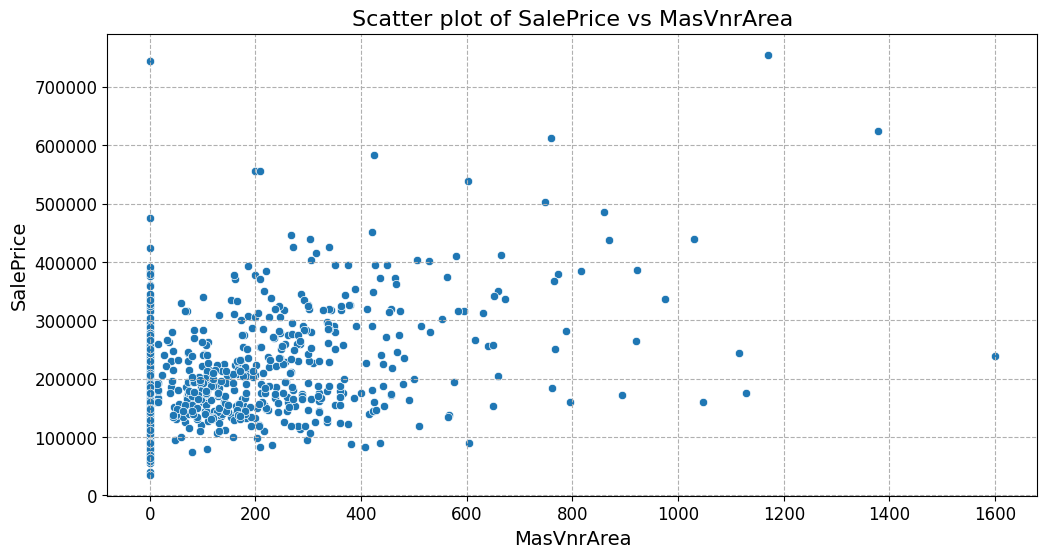

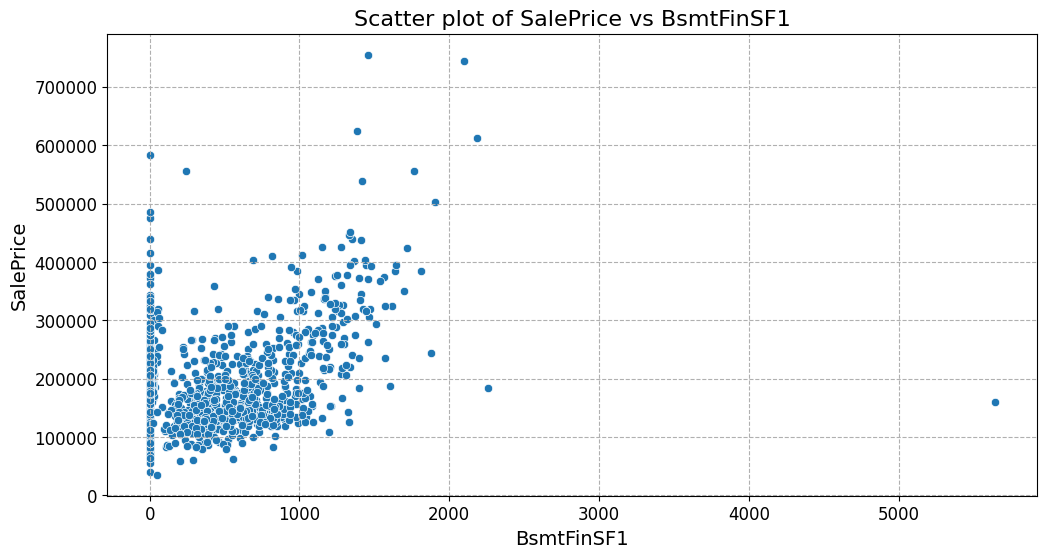

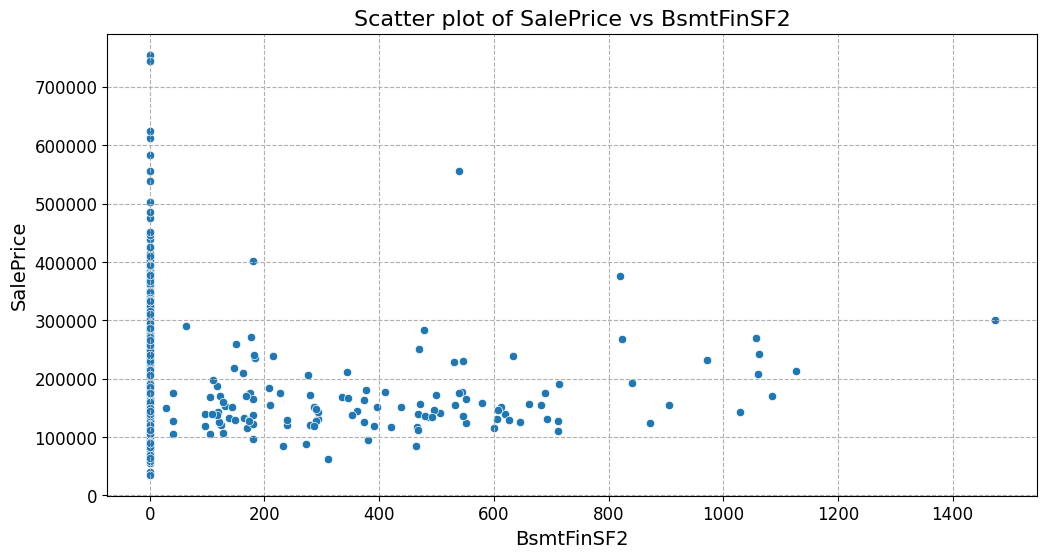

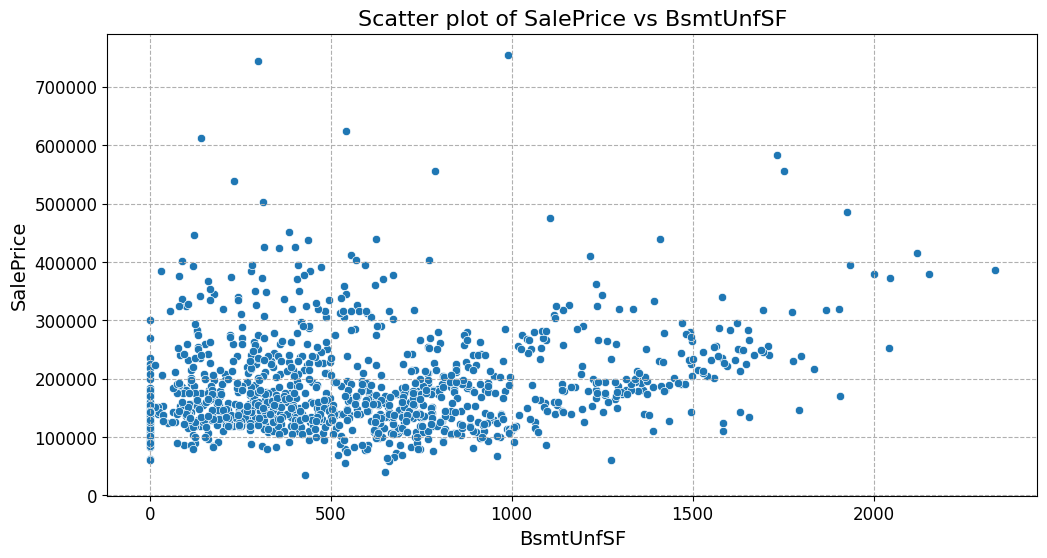

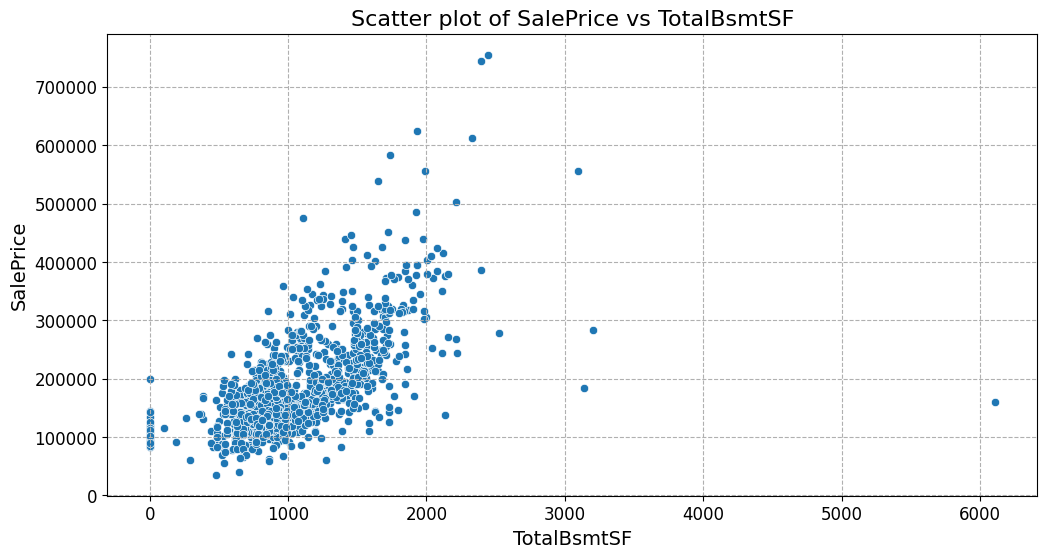

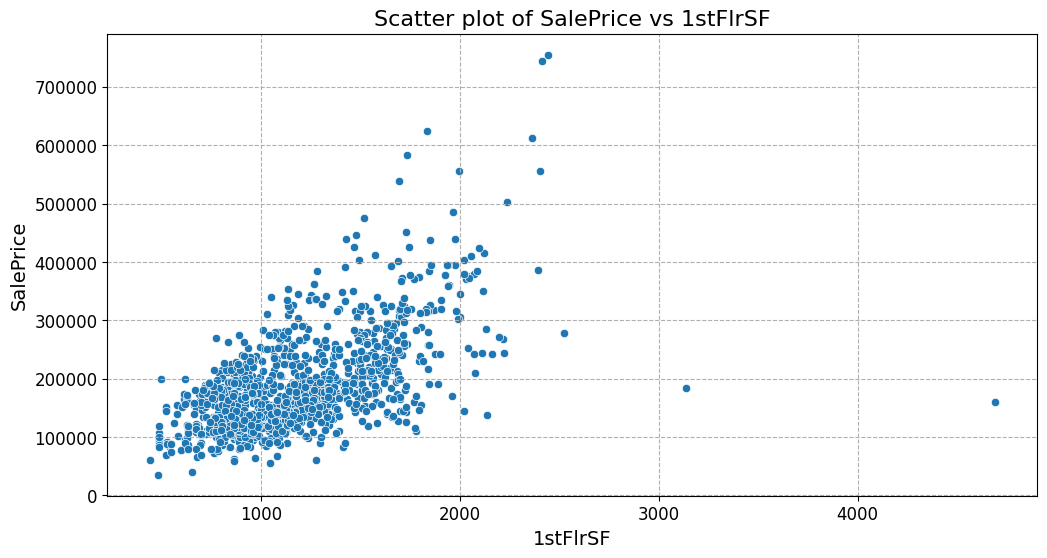

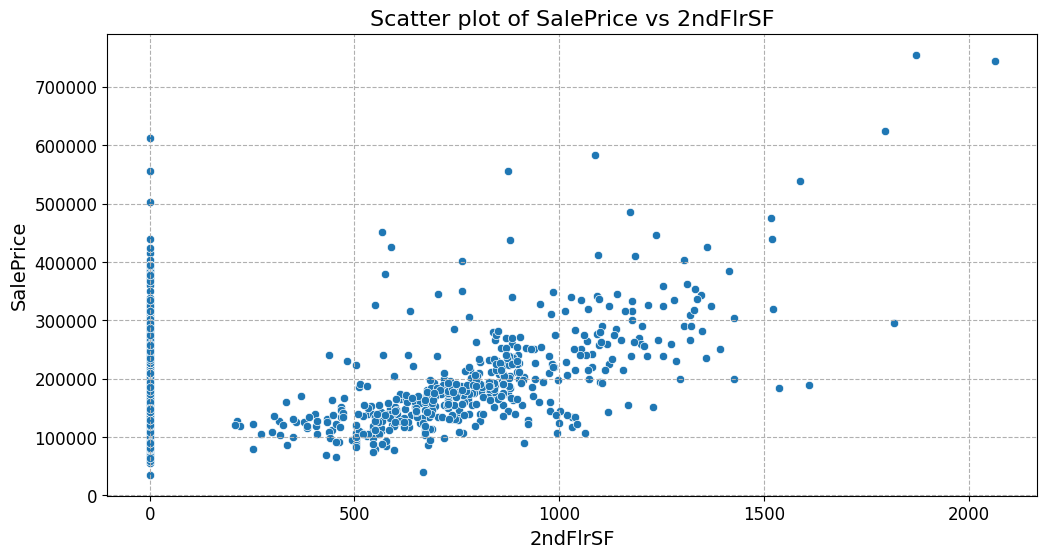

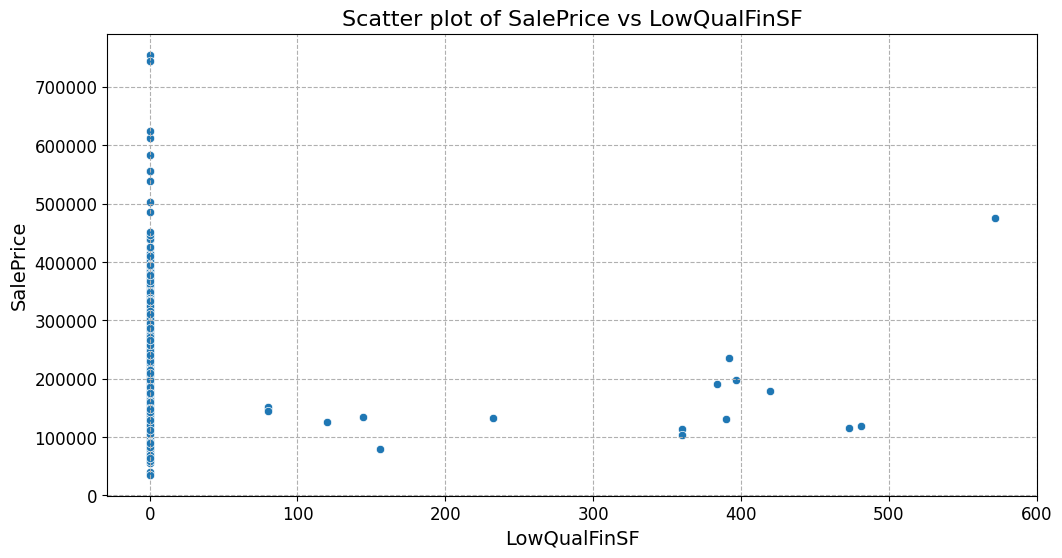

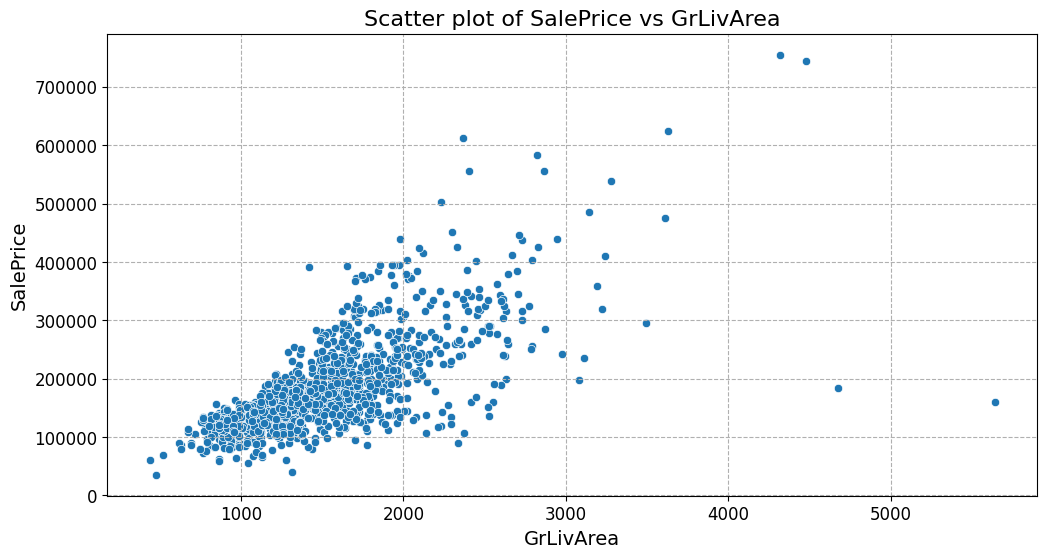

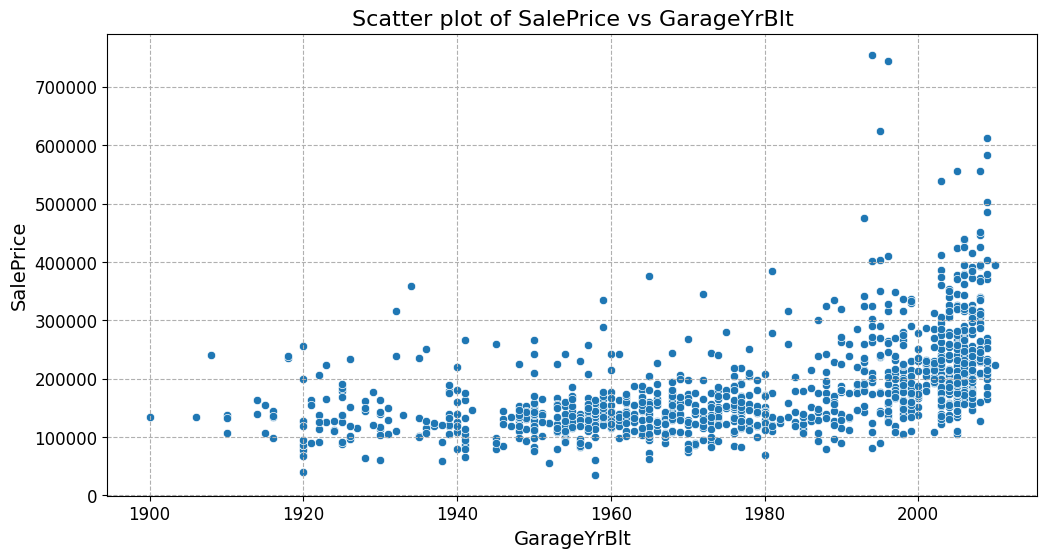

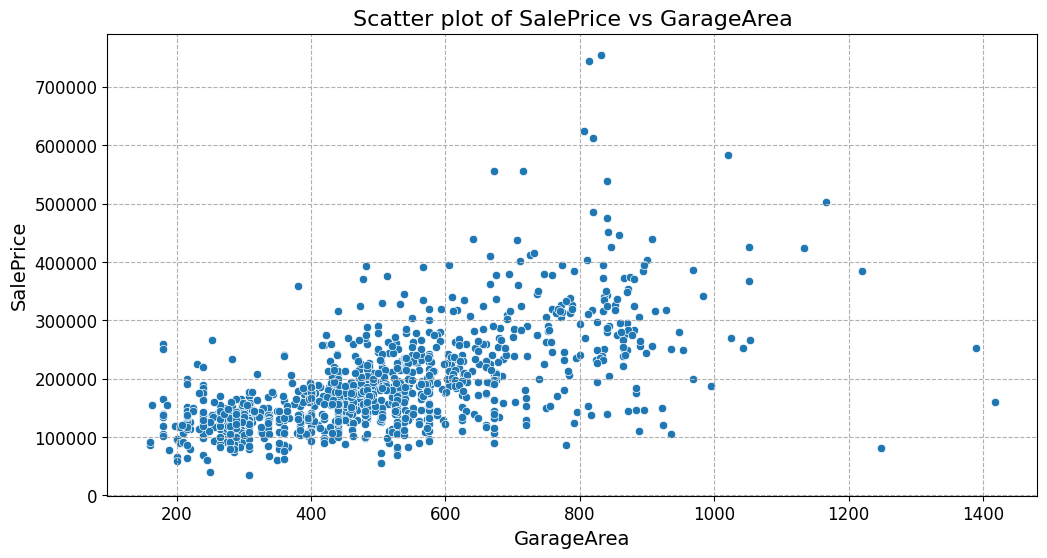

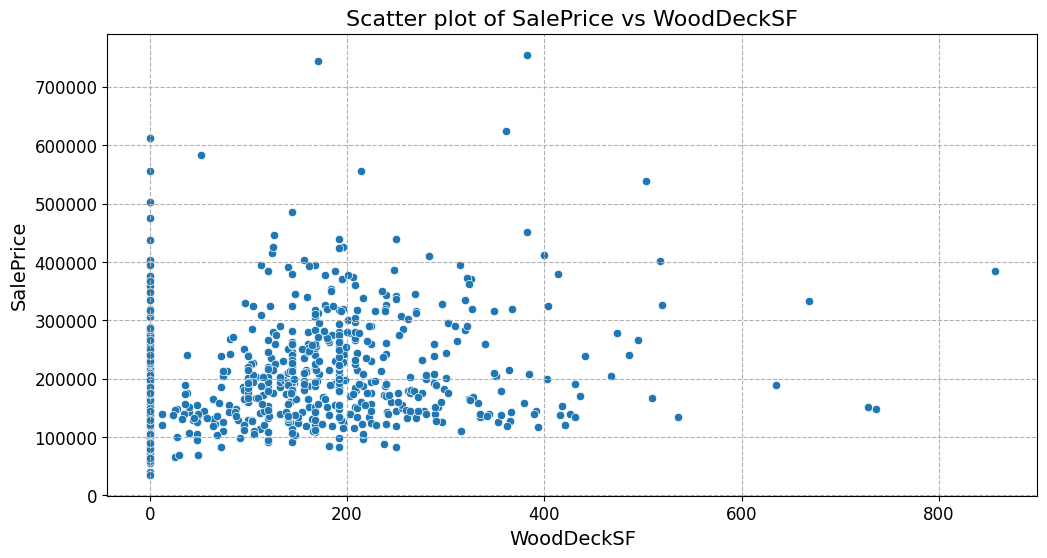

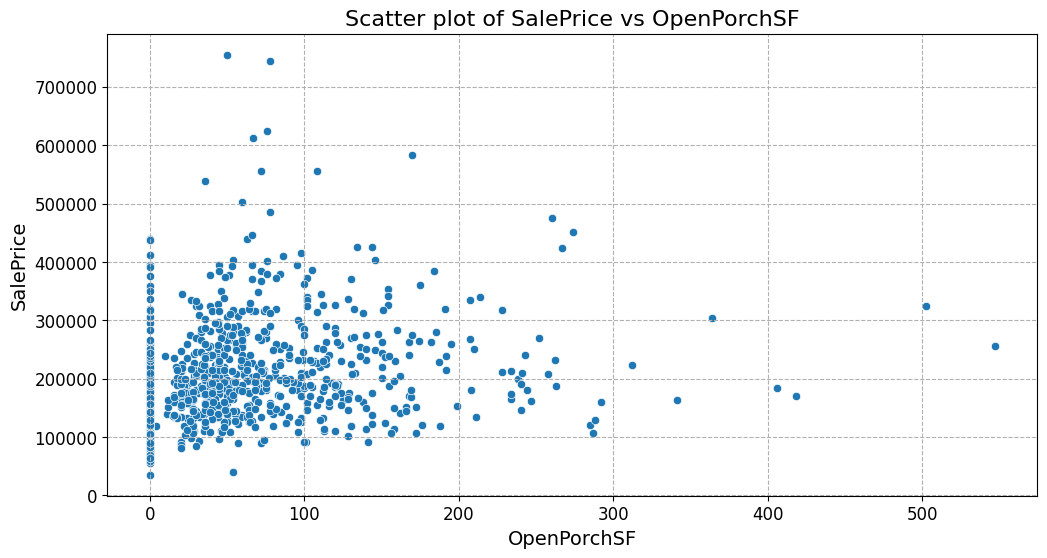

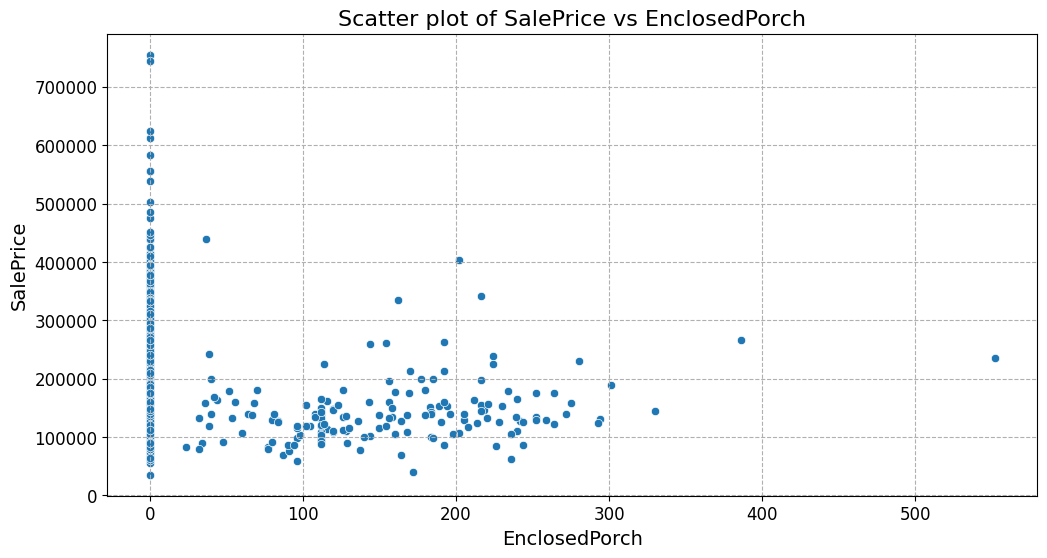

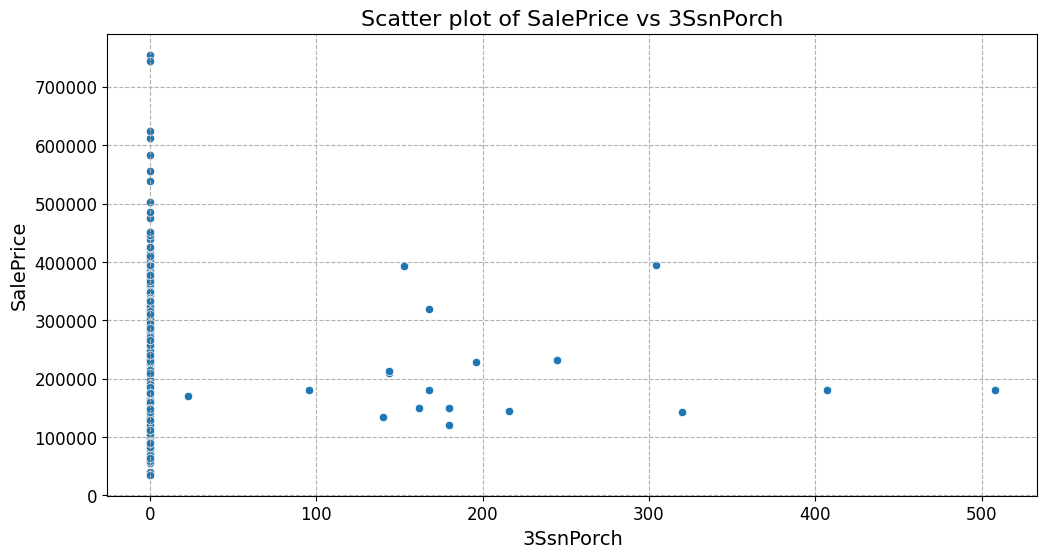

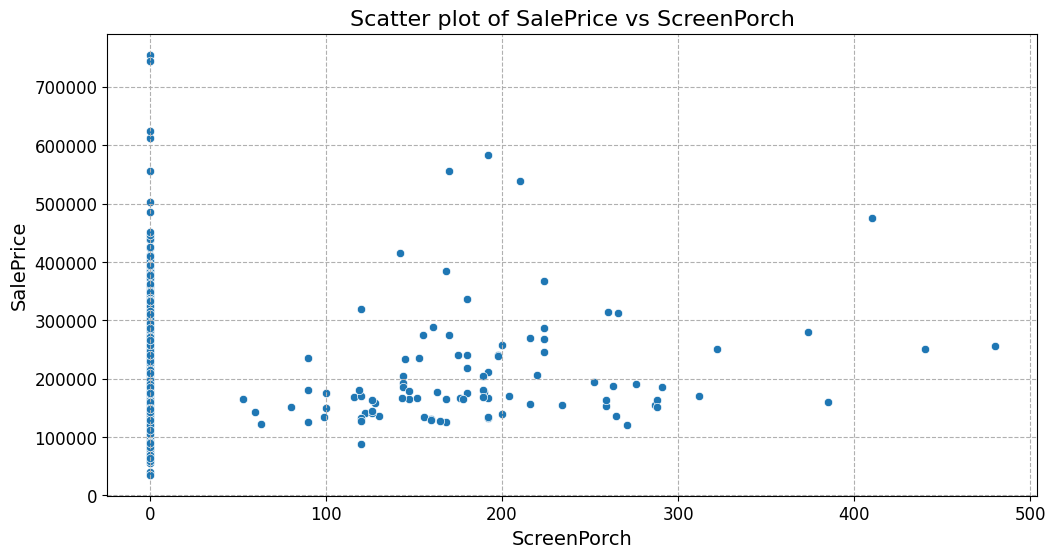

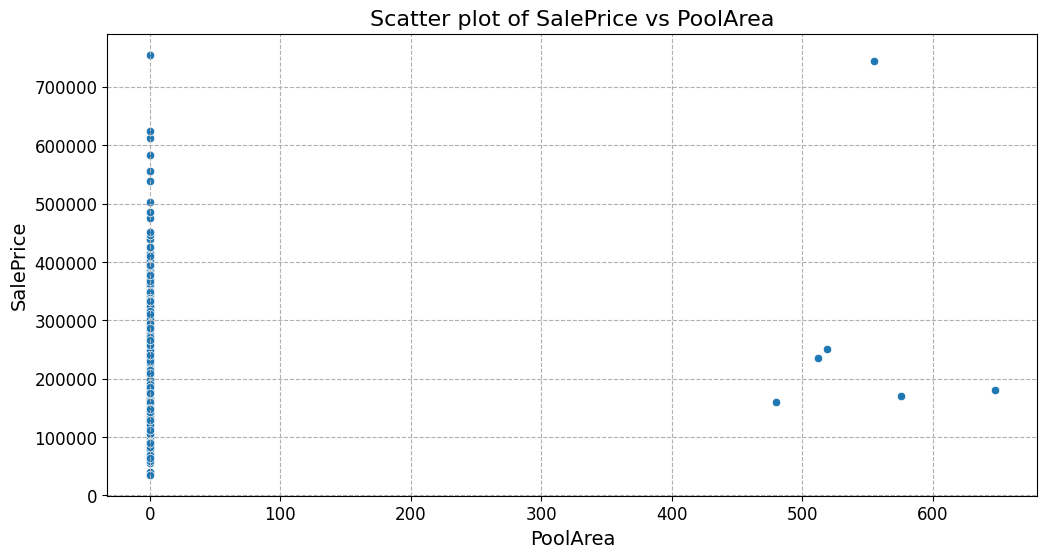

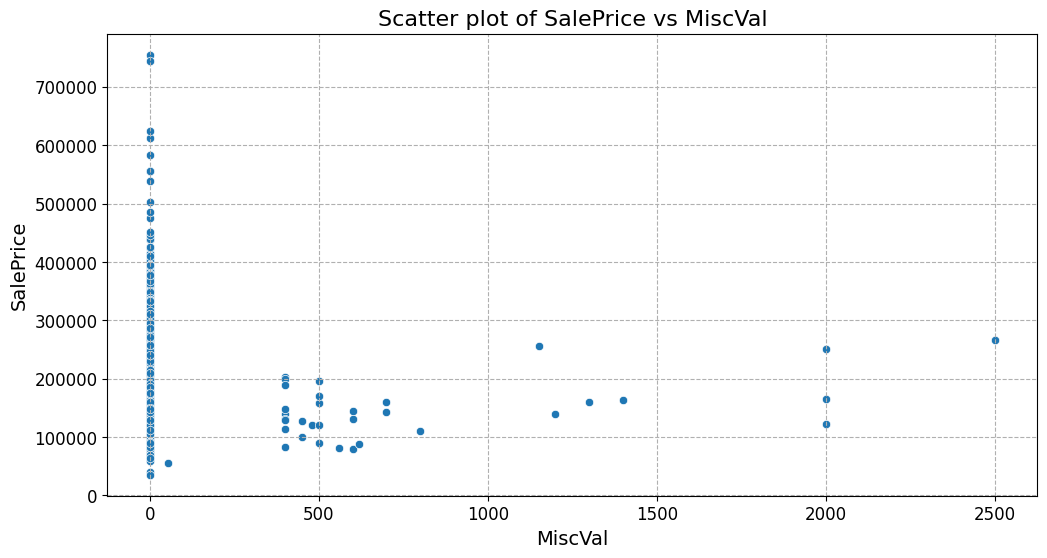

In [16]:
numeric_scatter = [col for col in numeric_col if col not in ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                                             'KitchenAbvGr','YearRemodAdd', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold', 'SalePrice']]

for scatter in numeric_scatter:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=scatter, y='SalePrice', data=train_for_EDA, palette="hsv")
    plt.title(f'Scatter plot of SalePrice vs {scatter}', fontsize=16)
    plt.xlabel(scatter, fontsize=14)
    plt.ylabel('SalePrice', fontsize=14)
    plt.xticks(rotation=0, fontsize=12)  
    plt.yticks(fontsize=12)
    plt.grid(linestyle='--') 
    plt.show()

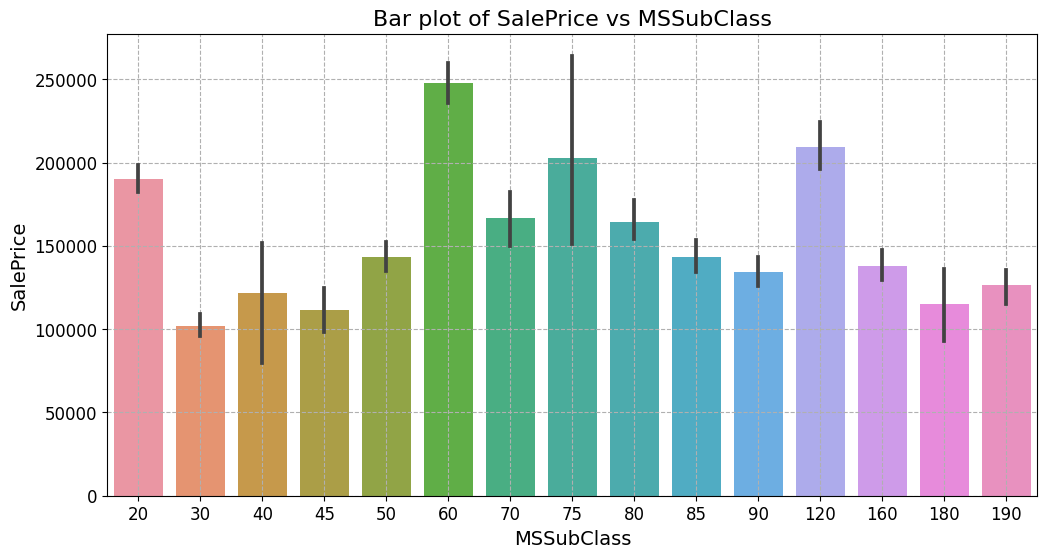

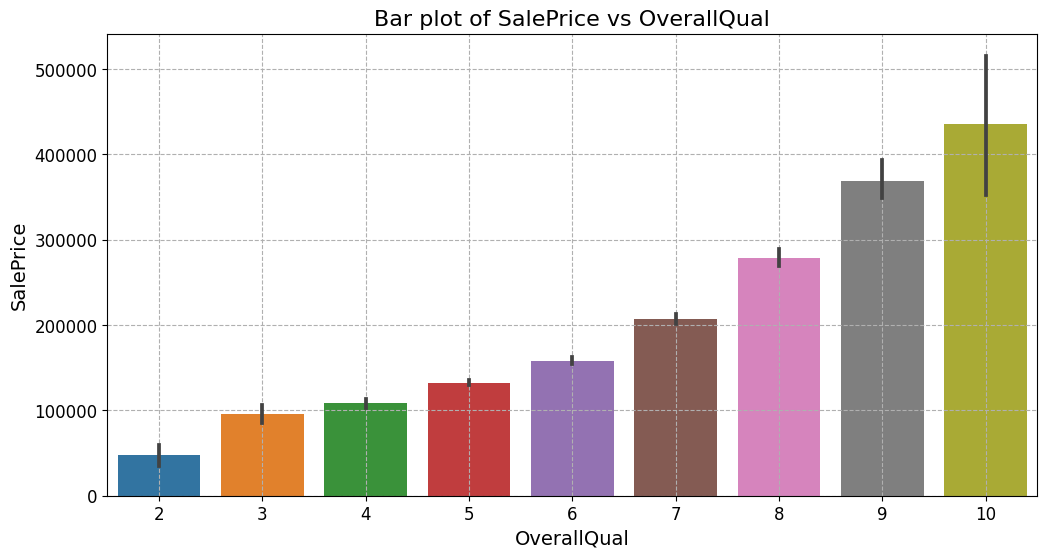

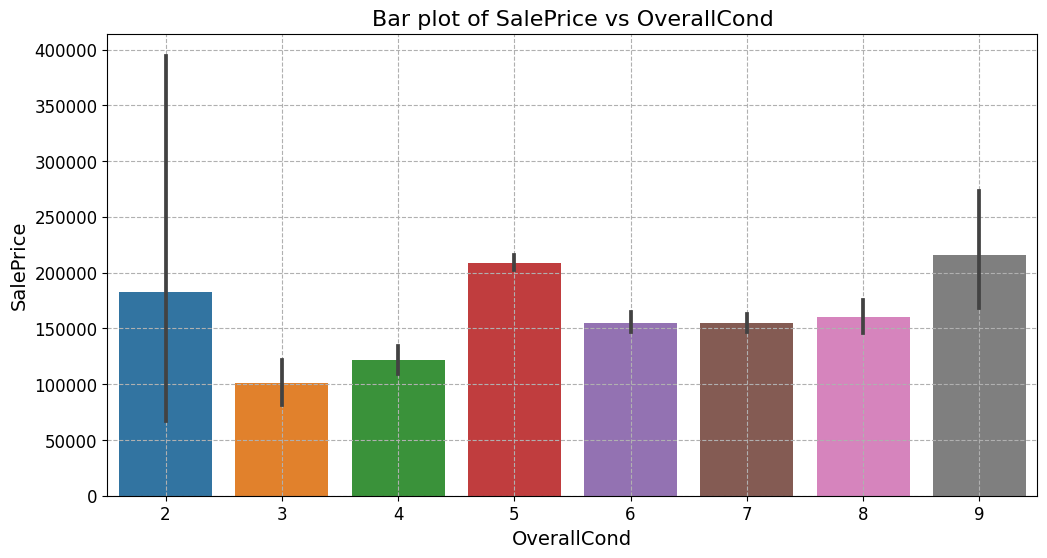

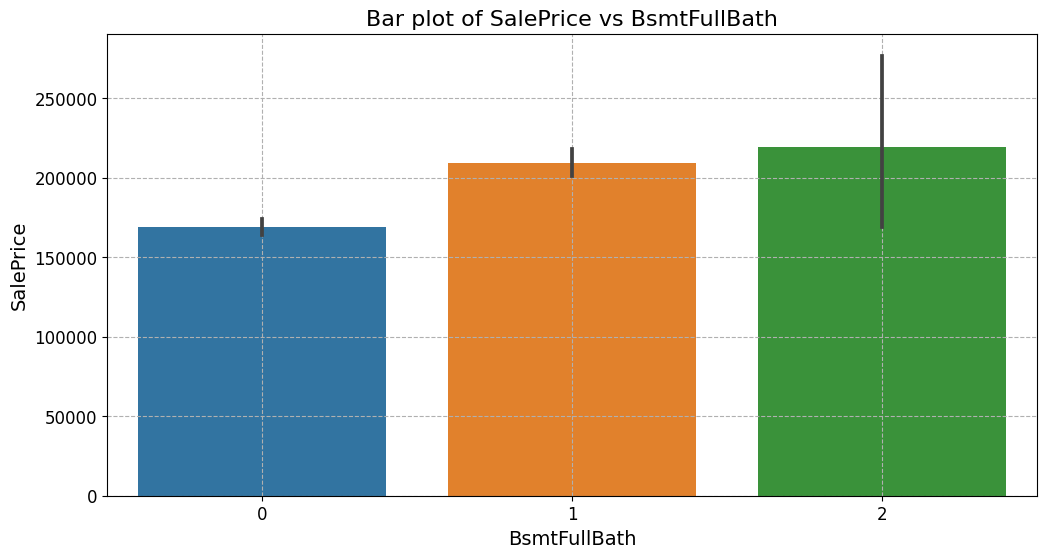

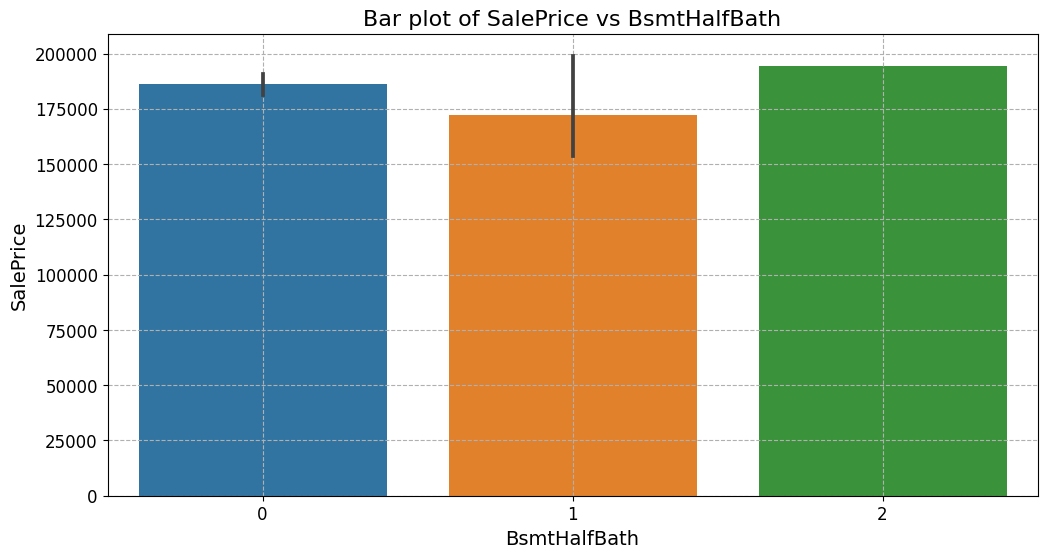

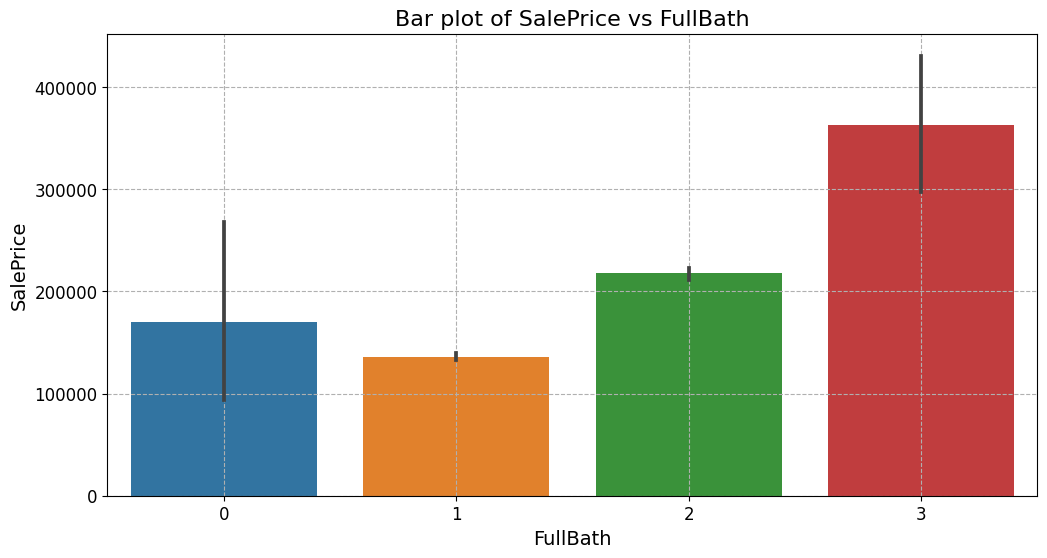

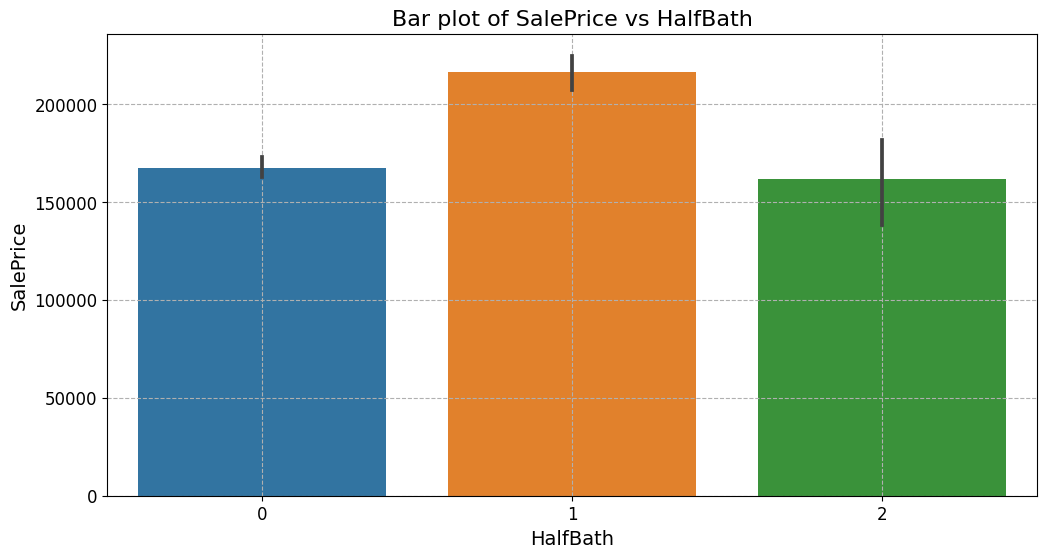

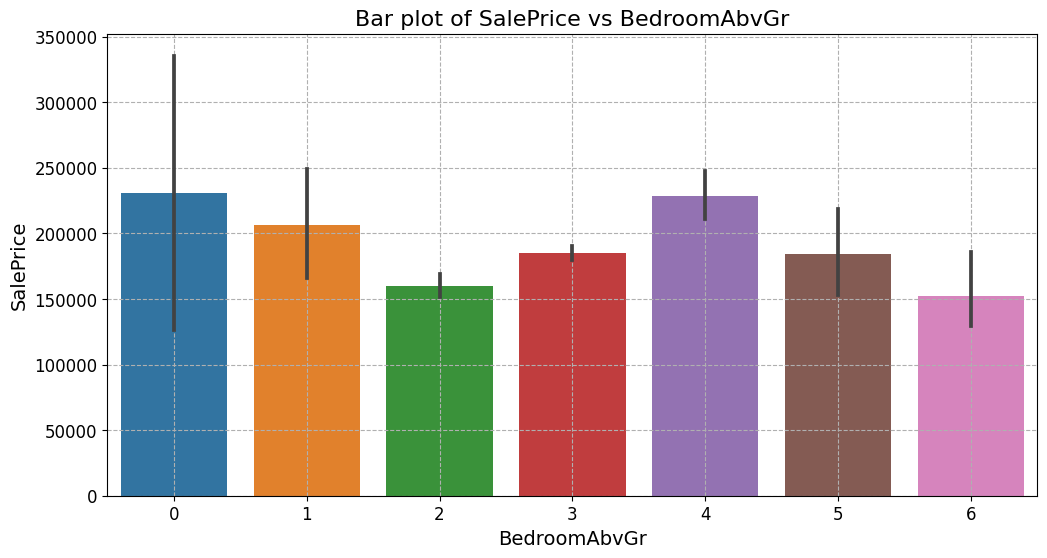

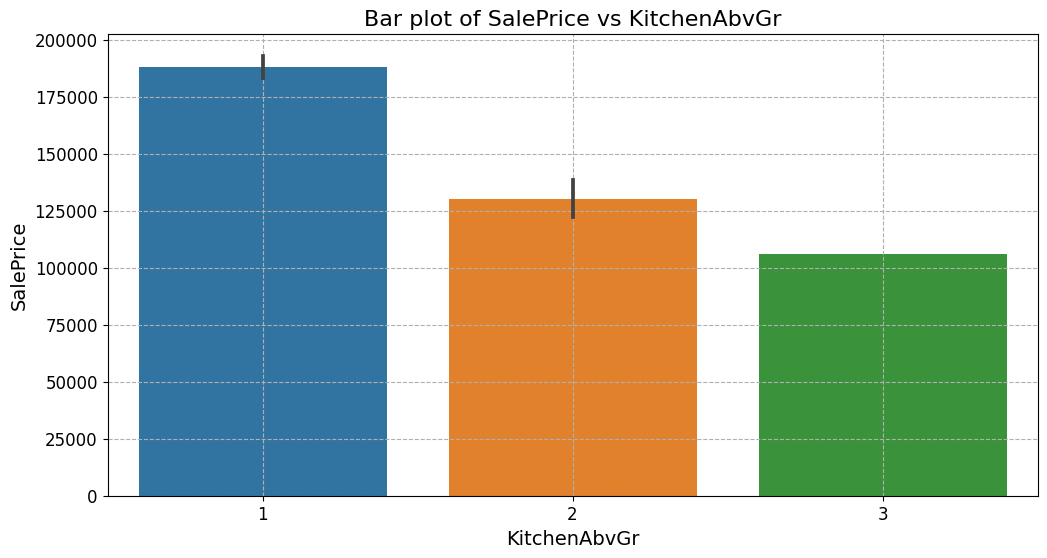

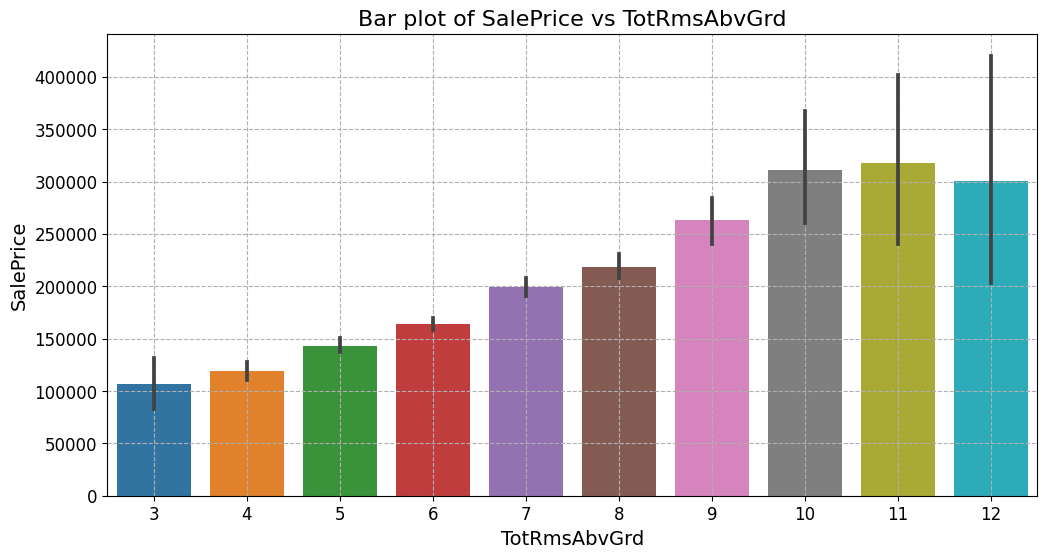

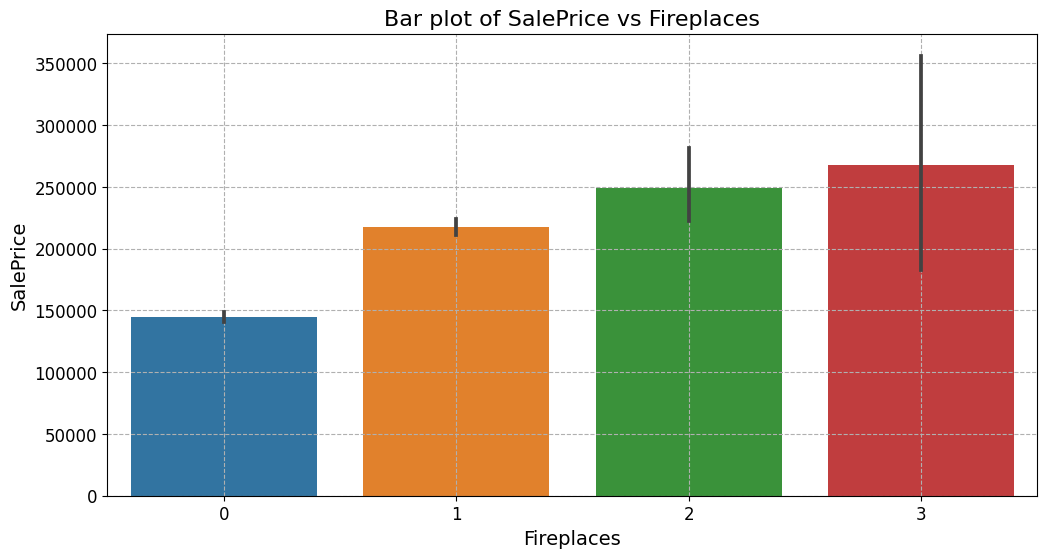

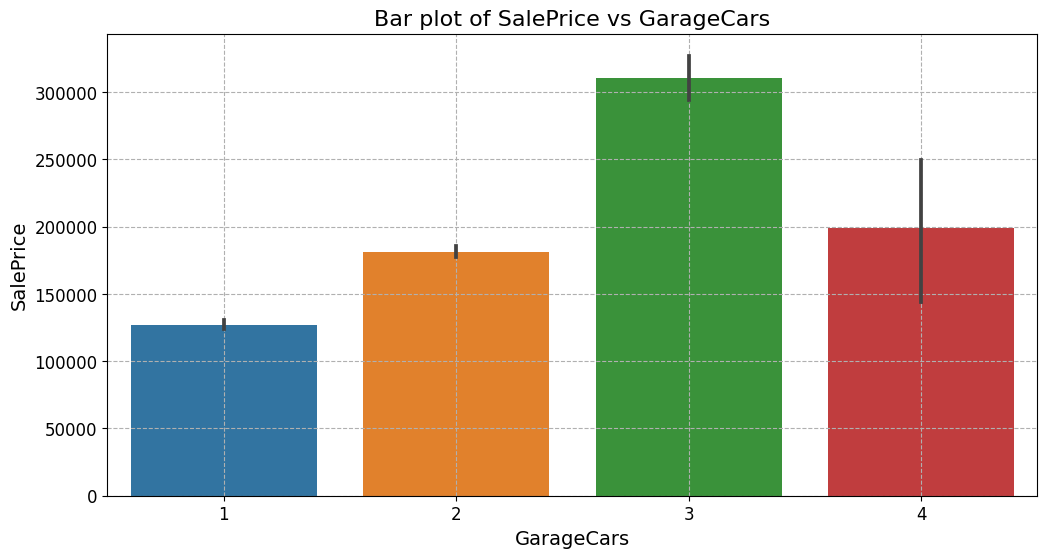

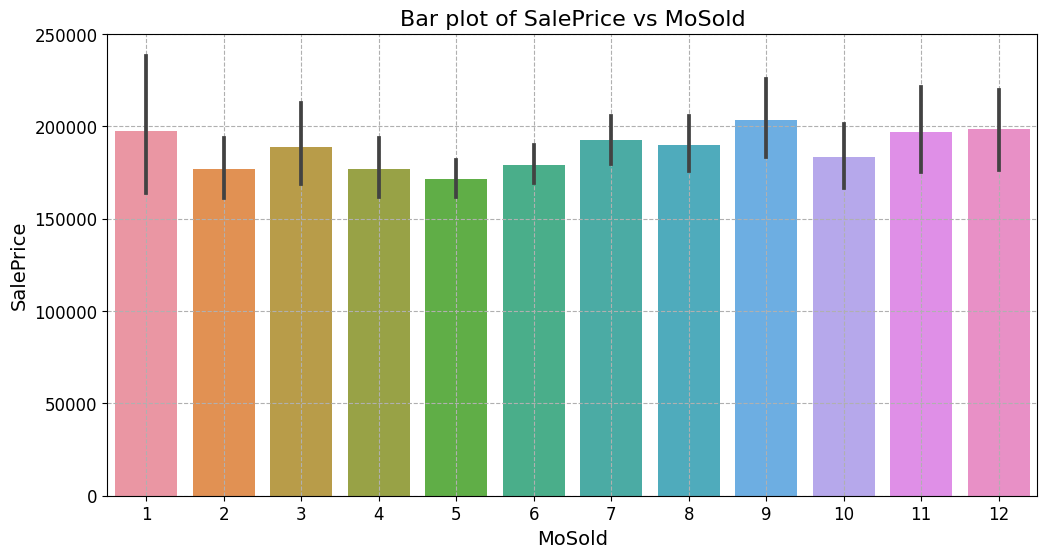

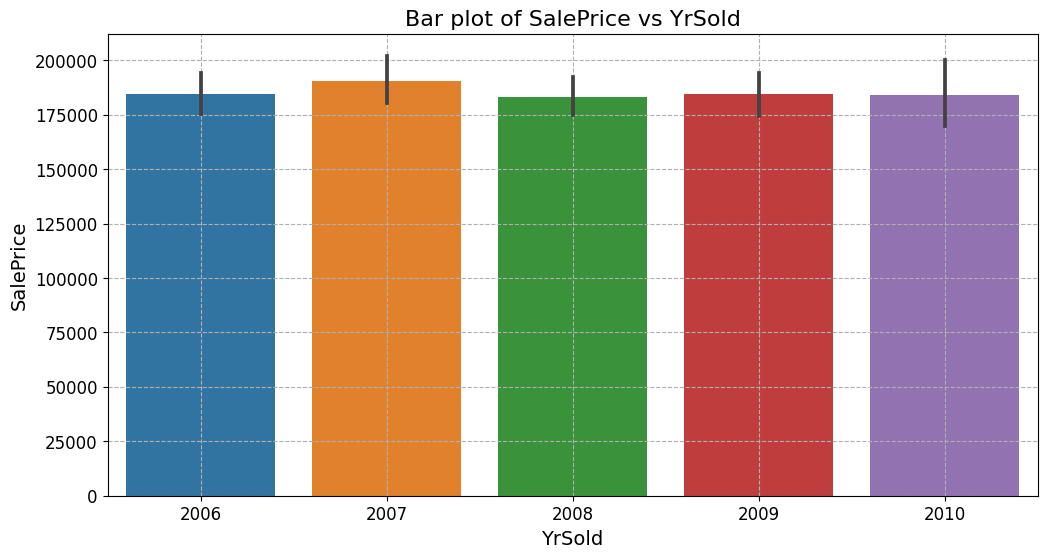

In [17]:
numeric_bar = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                                                           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']

for bar in numeric_bar:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=bar, y='SalePrice', data=train_for_EDA)
    plt.title(f'Bar plot of SalePrice vs {bar}',fontsize=16)
    plt.xlabel(bar,fontsize=14)
    plt.ylabel('SalePrice',fontsize=14)
    plt.xticks(rotation=0, fontsize=12)  
    plt.yticks(fontsize=12)
    plt.grid(linestyle='--')
    plt.show()

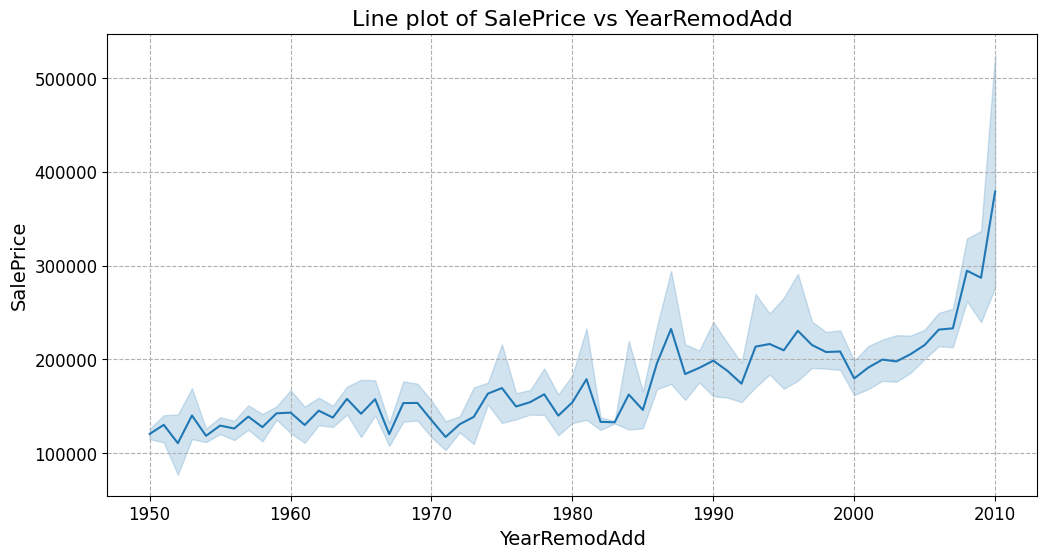

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearRemodAdd', y='SalePrice', data=train_for_EDA)
plt.title(f'Line plot of SalePrice vs YearRemodAdd',fontsize=16)
plt.xlabel('YearRemodAdd',fontsize=14)
plt.ylabel('SalePrice',fontsize=14)
plt.xticks(rotation=0, fontsize=12)  
plt.yticks(fontsize=12)
plt.grid(linestyle='--')
plt.show()

> #  Correlation Heatmap of Numeric Variables

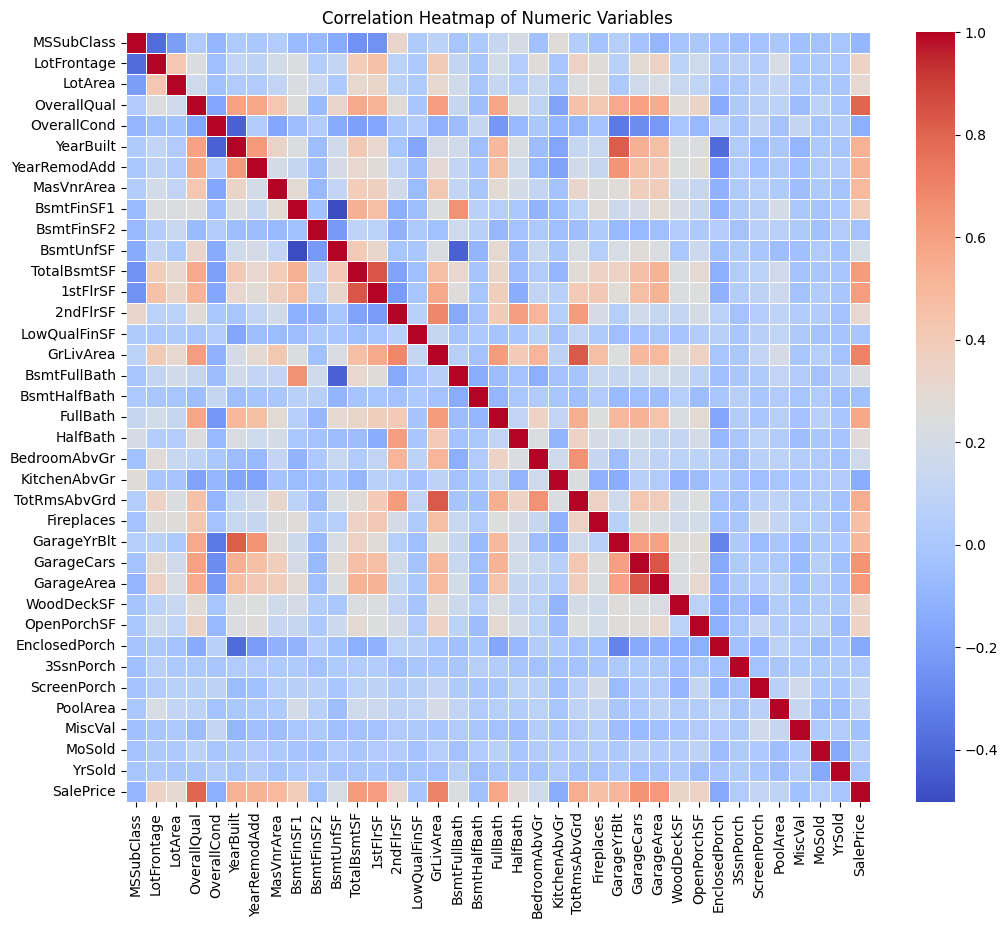

In [19]:
train_for_EDA_corr = train_for_EDA.select_dtypes(include=['number'])

plt.figure(figsize=(12, 10))
sns.heatmap(train_for_EDA_corr.corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

> # Average Sale Price by Neighborhood

In [20]:
train['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

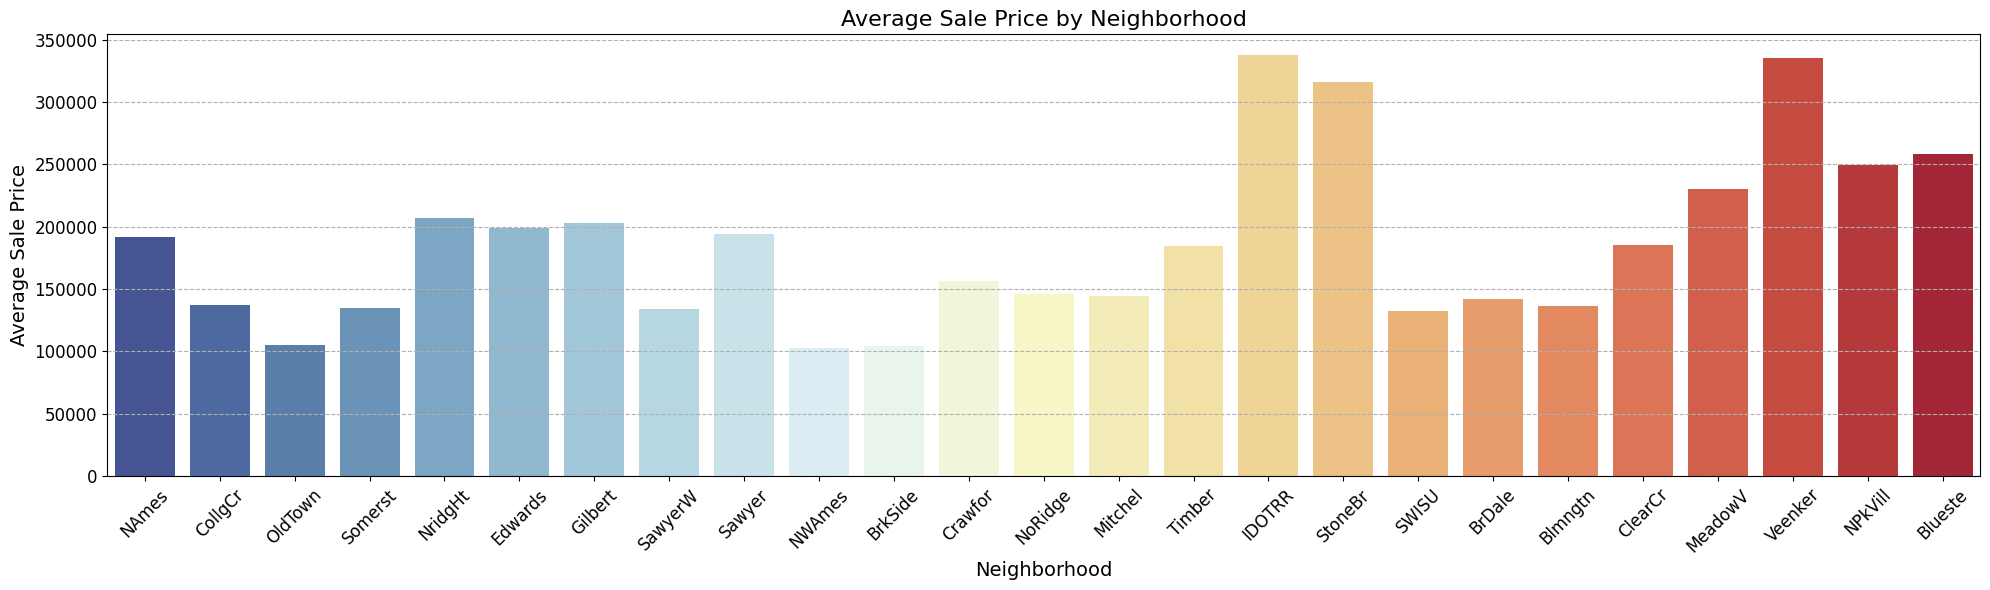

In [21]:
plt.figure(figsize=(20, 6))
sns.barplot(x=train_for_EDA['Neighborhood'].value_counts().index,
            y=train_for_EDA.groupby('Neighborhood')['SalePrice'].mean(),  
            palette='RdYlBu_r') 

plt.title('Average Sale Price by Neighborhood', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)  
plt.ylabel('Average Sale Price', fontsize=14)  
plt.xticks(rotation=45 , fontsize=12)  
plt.yticks(fontsize=12) 
plt.grid(axis='y', linestyle='--')  
plt.tight_layout()  
plt.show()

> # Sale Price Distribution by Sale Type

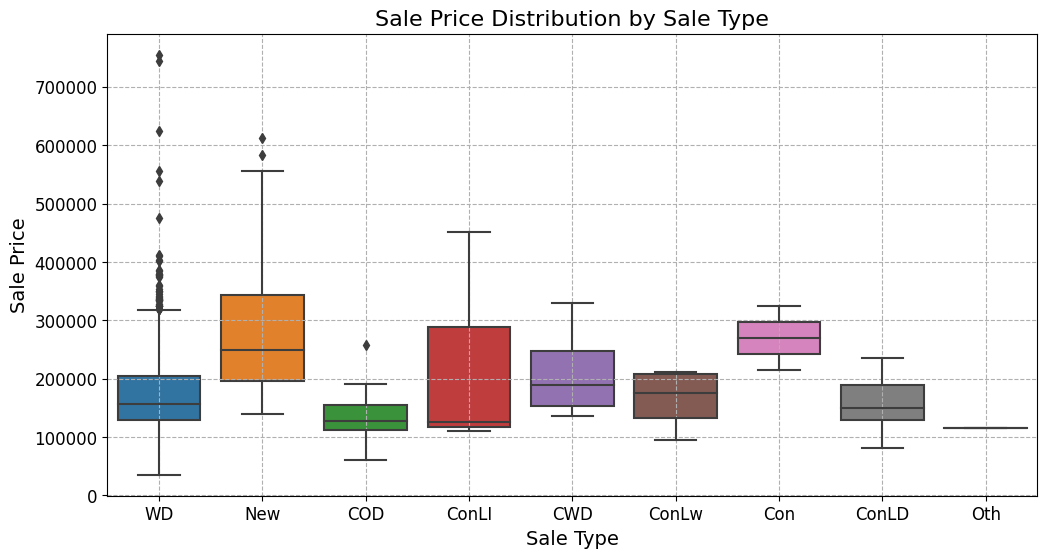

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='SaleType', y='SalePrice', data=train_for_EDA) 

plt.title('Sale Price Distribution by Sale Type', fontsize=16)
plt.xlabel('Sale Type', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--')
plt.show()

> # Sale Price Distribution by Pool 

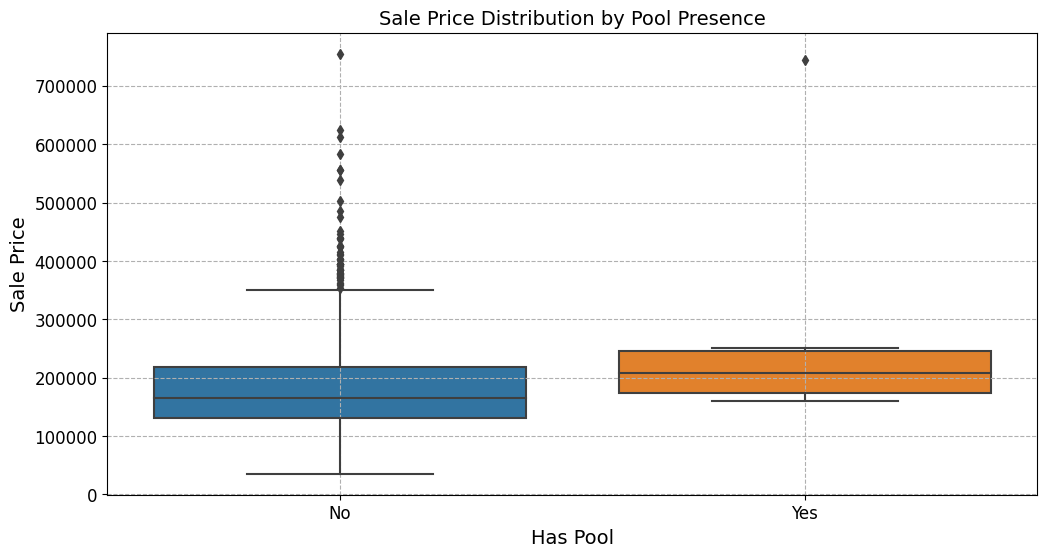

In [23]:
train_for_EDA['HasPool'] = train_for_EDA['PoolArea'].apply(lambda x: 'Yes' if x > 0 else 'No')
plt.figure(figsize=(12, 6))
sns.boxplot(x='HasPool', y='SalePrice', data=train_for_EDA)
plt.title('Sale Price Distribution by Pool Presence', fontsize=14)
plt.xlabel('Has Pool', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--')
plt.show()

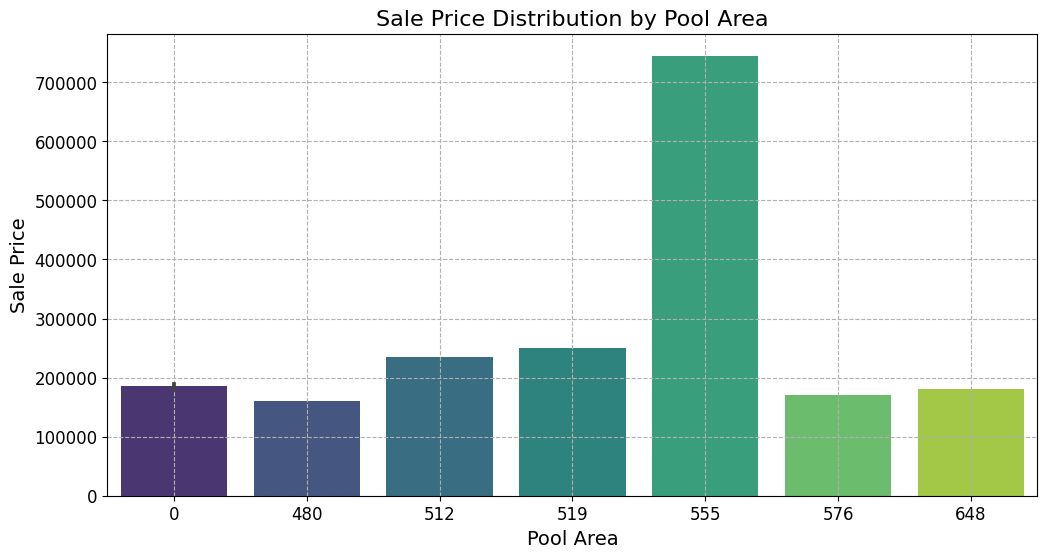

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x='PoolArea', y='SalePrice', data=train_for_EDA, palette='viridis')
plt.title('Sale Price Distribution by Pool Area', fontsize=16)
plt.xlabel('Pool Area', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--')
plt.show()

> # Sale Price Distribution by Characteristics of the house

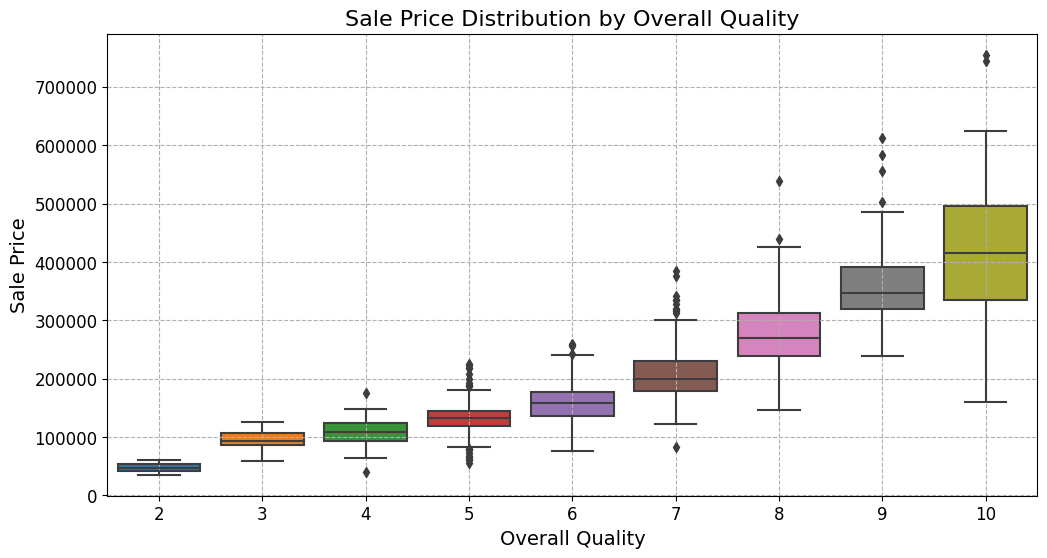

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_for_EDA)
plt.title('Sale Price Distribution by Overall Quality', fontsize=16)
plt.xlabel('Overall Quality', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--')
plt.show()

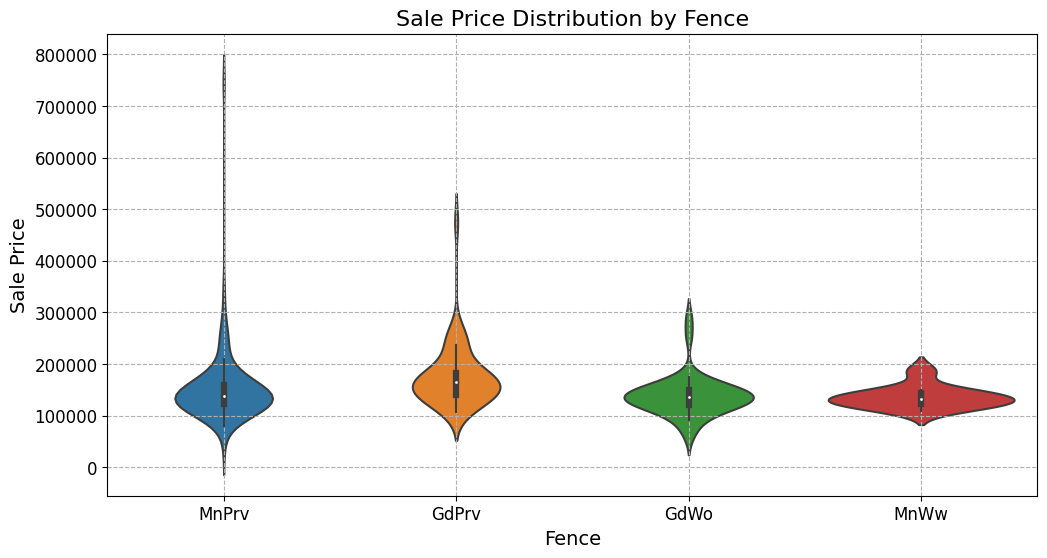

In [26]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Fence', y='SalePrice', data=train_for_EDA)
plt.title('Sale Price Distribution by Fence', fontsize=16)
plt.xlabel('Fence', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--')
plt.show()

> # Trend of Sale Price by Sale Year

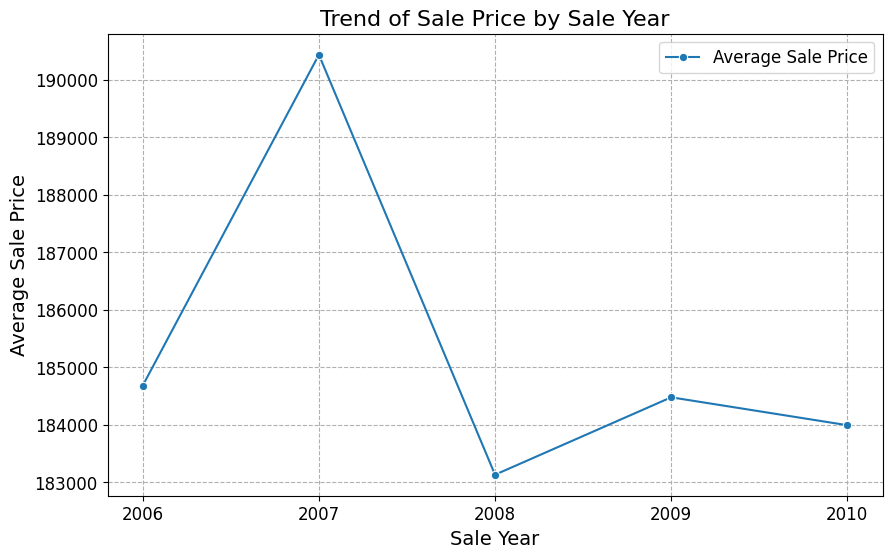

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='YrSold', y='SalePrice', data=train_for_EDA.groupby('YrSold')['SalePrice'].mean().reset_index(), marker='o', label='Average Sale Price')
plt.title('Trend of Sale Price by Sale Year', fontsize=16)
plt.xlabel('Sale Year', fontsize=14)
plt.ylabel('Average Sale Price', fontsize=14)
plt.xticks(np.arange(train_for_EDA['YrSold'].min(), train_for_EDA['YrSold'].max()+1, 1), fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(linestyle='--')
plt.show()

> # Price Distribution by Remodeling

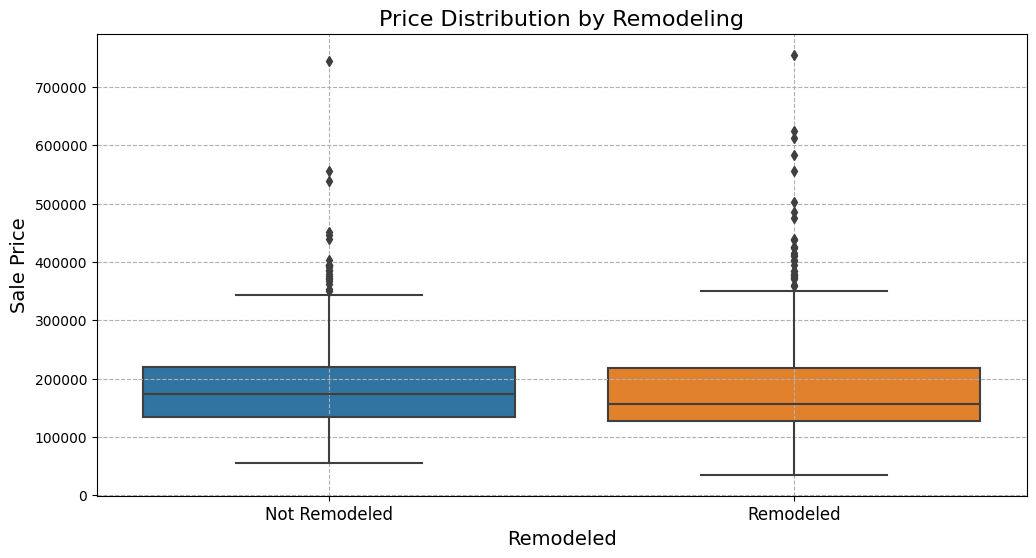

In [28]:
train_for_EDA['Remodeled'] = (train_for_EDA['YearRemodAdd'] != train_for_EDA['YearBuilt'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='Remodeled', y='SalePrice', data=train_for_EDA)
plt.title('Price Distribution by Remodeling', fontsize=16)
plt.xlabel('Remodeled', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.xticks([0, 1], ['Not Remodeled', 'Remodeled'], fontsize=12)
plt.grid(linestyle='--')
plt.show()

# Modeling : Predict the sales price for each house

> # Linear, Xgb, Cart, Rf, Lgbm, Gb (Regressor Model)

In [29]:
# Define features and target variable
X = train_for_model.drop(columns=['SalePrice'])
y = train_for_model['SalePrice']

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

feature_selector = SelectFromModel(RandomForestRegressor())

# Define the pipeline including feature selector and model
pipeline = Pipeline([
    ('feature_selector', feature_selector),
    ('regressor', RandomForestRegressor())
])

pipeline.fit(X_train_df, y_train)

X_train_selected = pipeline.named_steps['feature_selector'].transform(X_train_df)
X_test_selected = pipeline.named_steps['feature_selector'].transform(X_test_df)

selected_feature_indices = pipeline.named_steps['feature_selector'].get_support(indices=True)

selected_features = X_train_df.columns[selected_feature_indices]

print("Selected features:",selected_features)

Selected features: Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'BsmtQual_Ex',
       'BsmtQual_Gd'],
      dtype='object')


In [30]:
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_features)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_features)

In [31]:
linear_pipeline = Pipeline([
    ('regressor', LinearRegression())
])

xgb_pipeline = Pipeline([
    ('regressor', XGBRegressor())
])

cart_pipeline = Pipeline([
    ('regressor', DecisionTreeRegressor())
])

rf_pipeline = Pipeline([
    ('regressor', RandomForestRegressor())
])

lgbm_pipeline = Pipeline([
    ('regressor', LGBMRegressor())
])

gb_pipeline = Pipeline([
    ('regressor', GradientBoostingRegressor())
])

results = []

for pipeline in [linear_pipeline, xgb_pipeline,cart_pipeline, rf_pipeline, lgbm_pipeline, gb_pipeline]:
    pipeline.fit(X_train_selected_df, y_train)
    y_pred = pipeline.predict(X_test_selected_df)
    mse = mean_squared_error(y_test, y_pred)

    results.append({
        "Model": pipeline.named_steps['regressor'].__class__.__name__,
        "RMSE": mse**0.5
    })

results_df = pd.DataFrame(results)
results_df

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2424
[LightGBM] [Info] Number of data points in the train set: 896, number of used features: 21
[LightGBM] [Info] Start training from score 183339.549107
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Model,RMSE
0,LinearRegression,39826.422885
1,XGBRegressor,32832.395445
2,DecisionTreeRegressor,42802.802282
3,RandomForestRegressor,31921.500028
4,LGBMRegressor,33096.312652
5,GradientBoostingRegressor,31281.387269


> # TFDF Model

In [32]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [33]:
train_data = tf.data.Dataset.from_tensor_slices((dict(X_train_selected_df), y_train)).batch(32)
test_data = tf.data.Dataset.from_tensor_slices((dict(X_test_selected_df), y_test)).batch(32)

model_rf = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)
model_rf.fit(train_data)
model_gbt = tfdf.keras.GradientBoostedTreesModel(task=tfdf.keras.Task.REGRESSION)
model_gbt.fit(train_data)
model_cart = tfdf.keras.CartModel(task=tfdf.keras.Task.REGRESSION)
model_cart.fit(train_data)

mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = mse_rf**0.5
mse_gbt = mean_squared_error(y_test, y_pred)
rmse_gbt = mse_gbt**0.5
mse_cart = mean_squared_error(y_test, y_pred)
rmse_cart = mse_cart**0.5

Use /tmp/tmp03uf9tq4 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:07.592773. Found 896 examples.
Training model...


[INFO 24-04-08 03:02:38.6761 UTC kernel.cc:1233] Loading model from path /tmp/tmp03uf9tq4/model/ with prefix 4063cc39140a47ca


Model trained in 0:00:01.679747
Compiling model...


[INFO 24-04-08 03:02:39.0150 UTC decision_forest.cc:660] Model loaded with 300 root(s), 85172 node(s), and 21 input feature(s).
[INFO 24-04-08 03:02:39.0152 UTC abstract_model.cc:1344] Engine "RandomForestOptPred" built
[INFO 24-04-08 03:02:39.0152 UTC kernel.cc:1061] Use fast generic engine


Model compiled.
Use /tmp/tmpcgnbdyr5 as temporary training directory
Reading training dataset...


[WARNING 24-04-08 03:02:47.5948 UTC gradient_boosted_trees.cc:1886] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-04-08 03:02:47.5950 UTC gradient_boosted_trees.cc:1897] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-04-08 03:02:47.5950 UTC gradient_boosted_trees.cc:1911] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.424177. Found 896 examples.
Training model...
Model trained in 0:00:00.480619
Compiling model...


[INFO 24-04-08 03:02:48.5036 UTC kernel.cc:1233] Loading model from path /tmp/tmpcgnbdyr5/model/ with prefix 092dbf53604d40af
[INFO 24-04-08 03:02:48.5093 UTC quick_scorer_extended.cc:903] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-04-08 03:02:48.5098 UTC kernel.cc:1061] Use fast generic engine


Model compiled.
Use /tmp/tmp_9tufoxu as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.452646. Found 896 examples.
Training model...
Model trained in 0:00:00.021881
Compiling model...


[INFO 24-04-08 03:02:49.7699 UTC kernel.cc:1233] Loading model from path /tmp/tmp_9tufoxu/model/ with prefix ee813fb93cb74423
[INFO 24-04-08 03:02:49.7718 UTC decision_forest.cc:660] Model loaded with 1 root(s), 77 node(s), and 17 input feature(s).
[INFO 24-04-08 03:02:49.7724 UTC abstract_model.cc:1344] Engine "RandomForestOptPred" built
[INFO 24-04-08 03:02:49.7724 UTC kernel.cc:1061] Use fast generic engine


Model compiled.


In [34]:
models = {
    "RandomForestRegressor(TFDF)": model_rf,
    "GradientBoostingRegressor(TFDF)": model_gbt,
    "DecisionTreeRegressor(TFDF)": model_cart,
}

results = OrderedDict()
for name, model in models.items():
    y_pred = model.predict(test_data)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5
    results[name] = rmse

results_TFDF_df = pd.DataFrame(results.items(), columns=["Model", "RMSE"])
results_TFDF_df

8/8 [==============================] - 0s 3ms/step


,Model,RMSE
0,RandomForestRegressor(TFDF),34816.475708
1,GradientBoostingRegressor(TFDF),35962.861258
2,DecisionTreeRegressor(TFDF),52325.415547


> # Conclusion

In [35]:
conclusion_df = pd.concat([results_df, results_TFDF_df], ignore_index=True)
conclusion_df

,Model,RMSE
0,LinearRegression,39826.422885
1,XGBRegressor,32832.395445
2,DecisionTreeRegressor,42802.802282
3,RandomForestRegressor,31921.500028
4,LGBMRegressor,33096.312652
5,GradientBoostingRegressor,31281.387269
6,RandomForestRegressor(TFDF),34816.475708
7,GradientBoostingRegressor(TFDF),35962.861258
8,DecisionTreeRegressor(TFDF),52325.415547


In [36]:
min_rmse_model = conclusion_df[conclusion_df['RMSE'] == conclusion_df['RMSE'].min()]
print('Model (BEST RMSE) :', min_rmse_model['Model'].values[0])

Model (BEST RMSE) : GradientBoostingRegressor


### I use the GradientBoosting model because it has the low RMSE.

> # Evaluating GradientBoost

In [37]:
model = GradientBoostingRegressor()
model.fit(X_train_selected_df,y_train)

GradientBoostingRegressor()

In [38]:
y_pred = model.predict(X_test_selected_df)

comparison = pd.DataFrame({'actual': y_test, 'pred': y_pred})
comparison

,actual,pred
1297,140000,142615.949910
132,150750,150397.451341
300,157000,152338.654491
1307,138000,148857.461791
778,144000,117718.116319
...,...,...
401,164990,188541.305925
543,133000,154223.840522
1062,90000,166172.820679
1026,167500,139002.635015


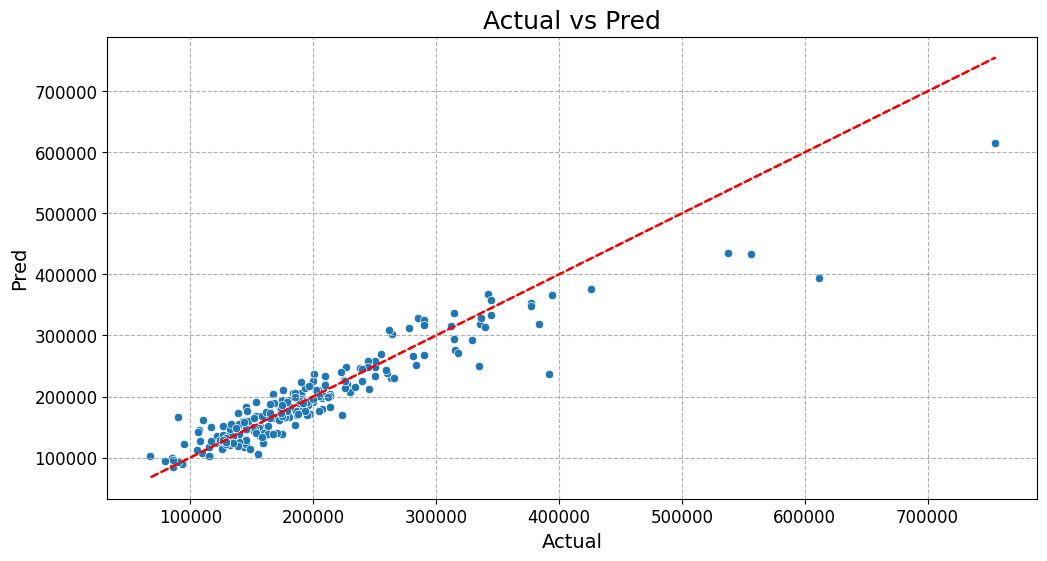

In [39]:
plt.figure(figsize=(12,6))

sns.scatterplot(x='actual', y='pred', data=comparison)
plt.plot(comparison['actual'], comparison['actual'], color='red', linestyle='--')
plt.title('Actual vs Pred', fontsize=18)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Pred', fontsize=14)
plt.xticks(rotation=0, fontsize=12)  
plt.yticks(fontsize=12)
plt.grid(linestyle='--')
plt.show()

> # Feature Importance

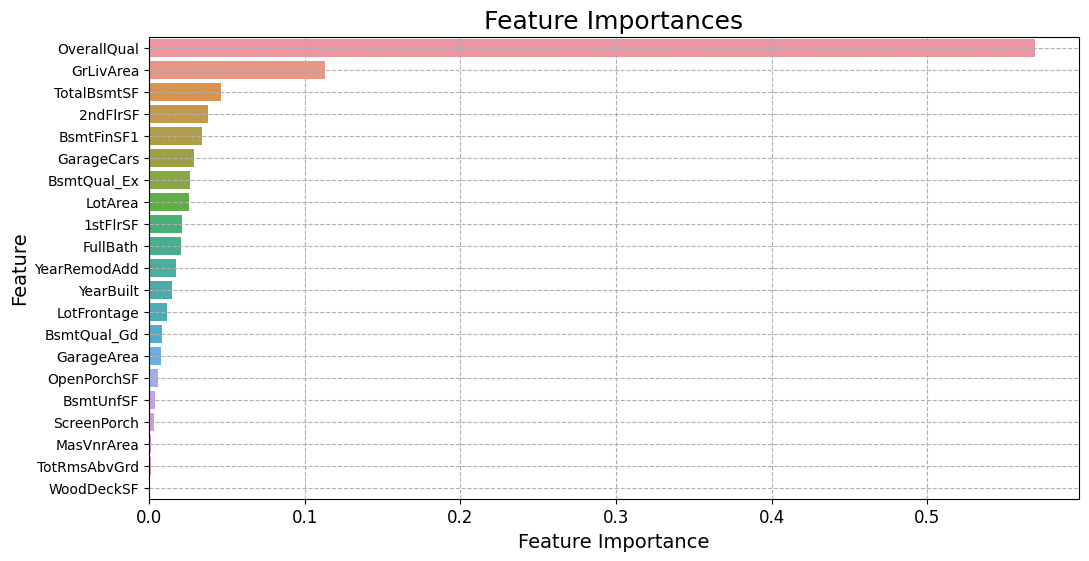

In [40]:
importances = model.feature_importances_

indices = np.argsort(importances)[::-1]

feature_names = X_train_selected_df.columns
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
plt.title('Feature Importances', fontsize=18)
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(rotation=0, fontsize=12)  
plt.yticks(fontsize=10)
plt.grid(linestyle='--')
plt.show()

# Submission

In [41]:
submission = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
submission

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [42]:
numeric_col = numeric_col.drop('SalePrice', errors='ignore')

submission[numeric_col] = submission[numeric_col].fillna(0)
submission_for_model = pd.DataFrame(submission, columns=selected_features)
submission_for_model = pd.get_dummies(submission_for_model)
submission_for_model = submission_for_model.fillna(0)

y_pred = model.predict(submission_for_model)

In [43]:
submission['SalePrice'] = y_pred  
submission[['Id', 'SalePrice']].to_csv('submission.csv', index=False)  

# Thanks